<img src='./img/header_placeholder.png' alt='Logo EU Copernicus ECMWF' align='right' width='100%'></img>

<br>

# CAMS global reanalysis (EAC4) monthly averaged fields

### About

This notebook provides you a practical introduction to the CAMS Global reanalysis (EAC4) data set. We will use the monthly averaged fields to analyse the distribution of Carbon Monoxide globally and at different vertical layers in the atmosphere for August 2020.

The notebooks has four sections. The first section [1 - Data preparation](#data_preparation) is mandatory, as it loads and prepares the dataset for the following parts. Sections 2 to 4 are practical examples of how to compute and analyse climatologies and anomalies on different spatial (global and regional) and temporal (annual, monthly and seasonal) levels.

The notebook has the following outline:

* [1 - Data preparation](#data_preparation)
* [2 - Calculation of the annual global mean surface air temperature anomaly](#global_mean)
* [3 - Calculation of the monthly surface air temperature anomaly in Europe](#monthly_europe)
* [4 - Calculation of seasonal variations of near-surface air temperature over the Arctic](#seasonal_arctic)

### Data

This notebook introduces you to the CAMS global reanalysis (EAC4) monthly averaged fields. The data has the following specifications:

> **Data**: `ERA5 monthly averaged data on single levels` <br>
> **Temporal coverage**: `Jan 1979 to Dec 2020` <br>
> **Spatial coverage**: `Global` <br>
> **Format**: `NetCDF`<br>
> **Retrieve request**: [CDS API request](./100_climate_data_store_intro.ipynb#era5_monthly)

Get [here](./101_c3s_data_intro.ipynb) more information about climate reanalysis data in general including an overview of they different dataset types.

### How to access the notebook
* via [nbviewer](https://github.com/ecmwf-projects/copernicus-training/blob/master/111_c3s_climatologies_anomalies.ipynb): view a static version of the notebook 
* via [Binder](https://mybinder.org/v2/gh/ecmwf-projects/copernicus-training/HEAD?urlpath=lab/tree/111_c3s_climatologies_anomalies.ipynb): run, execute and modify the notebook

<hr>

### Load libraries

In [1]:
# CDS API
import cdsapi

# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import pandas as pd

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

<hr>

## <a id='reanalysis'></a>CAMS global reanalysis (EAC4) monthly averaged fields

Extract the file, open it as an Xarray dataset, and inspect the contents:

In [46]:
with ZipFile(f'{DATADIR}/EAC4_2020-08_CO.zip', 'r') as zipObj:
   zipObj.extractall(path=f'{DATADIR}/EAC4_2020-08_CO/')

In [2]:
ds_co = xr.open_dataset('./data/cams_eac4_202008_pl.nc')
ds_co

OSError: [Errno -51] NetCDF: Unknown file format: b'/Volumes/gdrive/cop_consultancy/dev/data/cams_eac4_202008_pl.nc'

In [48]:
da_co = ds_co['co']
da_co

<xarray.DataArray 'co' (time: 1, level: 15, latitude: 241, longitude: 480)>
[1735200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * level      (level) int32 100 150 200 250 300 400 ... 850 900 925 950 1000
  * time       (time) datetime64[ns] 2020-08-01
Attributes:
    units:          kg kg**-1
    long_name:      Carbon monoxide
    standard_name:  mass_fraction_of_carbon_monoxide_in_air

### Create meridional mean plot
We will now create a meridional mean plot to visualise the changing concentrations of CO at different longitudes and at various levels of the atmosphere. We will focus on the northern hemisphere and average over the latitudinal axis. In this way we can visualise a two dimensional plot of CO concentrations by longitude and altitude.

To visualise this plot we first need to prepare our data. This includes filtering to keep only data over the northern hemisphere and taking the mean over the latitudinal axis.

In [49]:
# Filter the data to include only the northern hemisphere 
north = da_co.where((da_co.latitude >= 0), drop=True)

# Average (mean) over the latitudinal axis
co = north.mean(dim="latitude")

Now we can plot and visualise our data. 

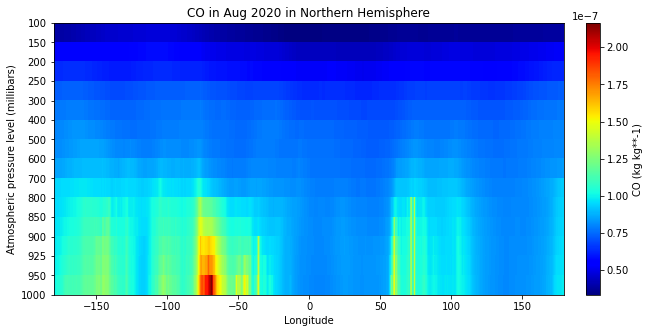

In [50]:
# The y axis (pressure levels) is a non-linear scale.
# To ensure equal spacing between the values, we create a regular scale.
y = np.arange(co.level.shape[0])+1
y = y[::-1]

# Define the figure and specify size
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1,1,1)

# Set x and y axis tickmarks, labels and figure title
ax.yaxis.set_ticks(y)
ax.yaxis.set_ticklabels(co.level.values)
ax.set_xlabel('Longitude')
ax.set_ylabel('Atmospheric pressure level (millibars)')
ax.set_title('CO in Aug 2020 in Northern Hemisphere', fontsize=12)

# As the presure levels (25) are much less than the longitudes (480),
# we need to ensure the plot fits into the size of the figure.
ax.set_aspect('auto')

# Plot the figure and specify a colourbar
im = plt.pcolormesh(co.longitude-180, y, co[0,:,:], cmap='jet')
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.set_label('CO (kg kg**-1)')

Notice how the concentration and longitudinal distribution of CO varies at different levels of the atmosphere!

<hr>

<p><img src='./img/copernicus_logo.png' align='right' alt='Logo EU Copernicus' width='20%'></img></p>
<br><br><br><br><br>
<span style='float:right'><p style=\"text-align:right;\">This project is licensed under <a href="./LICENSE">APACHE License 2.0</a>. | <a href=\"https://github.com/ecmwf-projects/copernicus-training">View on GitHub</a></span>